In [1]:
import requests
import csv
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot
import matplotlib

In [2]:
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'
id_table = 'ctl00_Contenido_tblÍndices'
path = 'bolsa_ibex35.csv'

page = requests.get(url_page).text
soup = BeautifulSoup(page, "lxml")

name = ""
info = ""
nroFila = 0
table = soup.find("table", {'id': 'ctl00_Contenido_tblÍndices' })
for fila in table.find_all("tr"):    
    nroCelda=0
    for celda in fila.find_all('td'): 
        if nroCelda==0:
            name=celda.text      

        if nroCelda== 3:    
            info=celda.text
        nroCelda+=1
    nroFila+=1

In [3]:
    with open(path, 'a', newline='', encoding='utf-8') as csv_file:   
        writer = csv.writer(csv_file)
        writer.writerow([name, info, datetime.now()])    #Abre el archivo y escribe cada fila en forma de list para que el archivo csv lo detecte
    csv_file.close()

In [5]:
    df = pd.read_csv(path)     #Con la libreria pandas guardo el archivo en formato de Tabla
    headerList= ["Name" ,"Ultimo", "Porcentaje", "Fecha"]  
    df.columns = headerList
    
    df.to_csv(path, index=False)    #Le agrego un header con pandas

    df = df.sort_values(["Porcentaje"], ascending=True)     #A la tabla antes hecha la ordeno y la guardo
    df

,Name,Ultimo,Porcentaje,Fecha
6,ARCELORMIT.,27.905,-0.02,2021-09-13 19:50:07.561735
1,ACERINOX,11.355,-0.26,2021-09-13 19:50:07.558743
12,CELLNEX,56.66,-1.01,2021-09-13 19:50:07.583099
28,PHARMA MAR,78.46,-1.93,2021-09-13 19:50:07.591993
34,VISCOFAN,59.5,0.25,2021-09-13 19:50:07.594984
21,INDITEX,29.5,0.27,2021-09-13 19:50:07.589002
17,FLUIDRA,37.55,0.54,2021-09-13 19:50:07.586009
5,AMADEUS,52.0,0.62,2021-09-13 19:50:07.561735
4,ALMIRALL,13.94,0.65,2021-09-13 19:50:07.560738
13,CIE AUTOMOT.,23.7,0.77,2021-09-13 19:50:07.584015


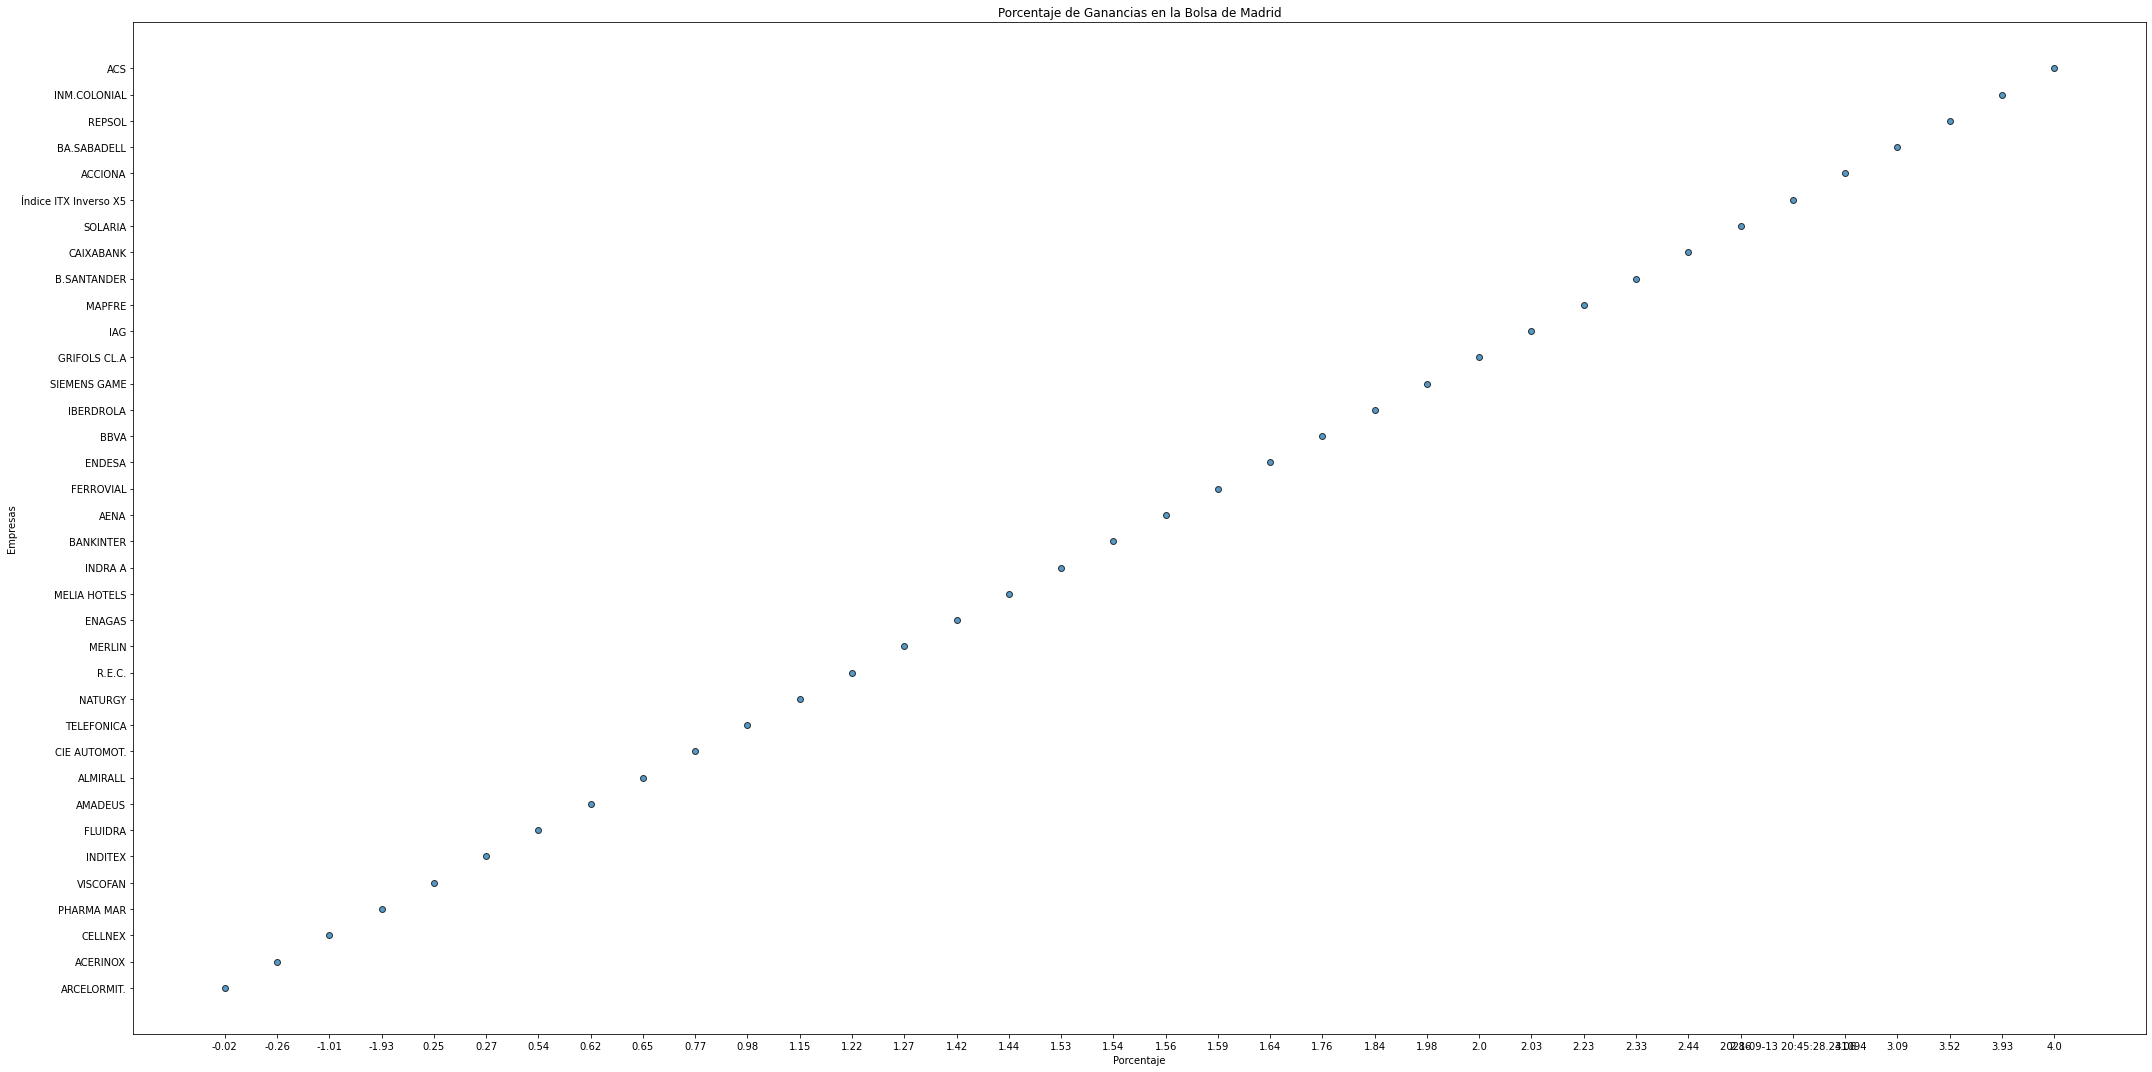

In [10]:
    names = df["Name"]
    porcentajes = df["Porcentaje"]

    matplotlib.rcParams["figure.figsize"] = 30 , 15
    pyplot.scatter(porcentajes, names, edgecolors="black", linewidths=1,alpha=0.75)
    pyplot.title("Porcentaje de Ganancias en la Bolsa de Madrid")
    pyplot.xlabel("Porcentaje")
    pyplot.ylabel("Empresas")
    pyplot.tight_layout()
    pyplot.show()